In [2]:
import pandas as pd
import numpy as np
import statistics
import matplotlib
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [3]:
df = pd.read_csv('../developer_survey_2020/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [32]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [6]:
print(f'{df.shape[0]:,} developers participated in the survey')

64,461 developers participated in the survey


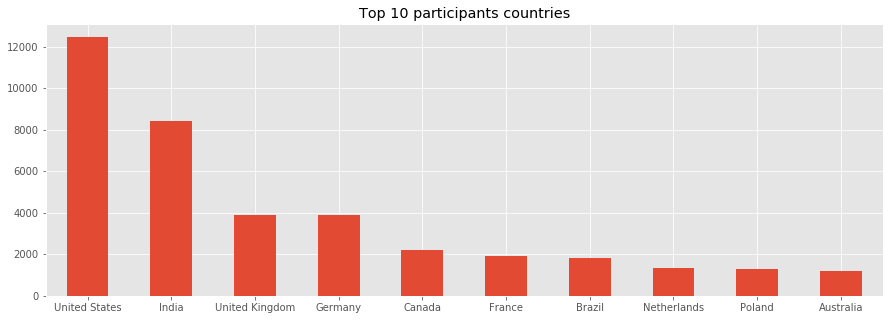

In [5]:
df.Country.value_counts().head(10).plot(kind='bar', figsize=(15,5), title="Top 10 participants countries",rot=0)

In [19]:
nig_dev = df.loc[(df['Country'] == 'Nigeria'), df.columns]

In [20]:
print(f'{nig_dev.shape[0]:,} nigerian developers participated in the survey')

593 nigerian developers participated in the survey


In [59]:
import math
avg = math.ceil(nig_dev['Age1stCode'].astype(float).mean())
print(f'Average age at first code is {avg:,}')

Average age at first code is 20


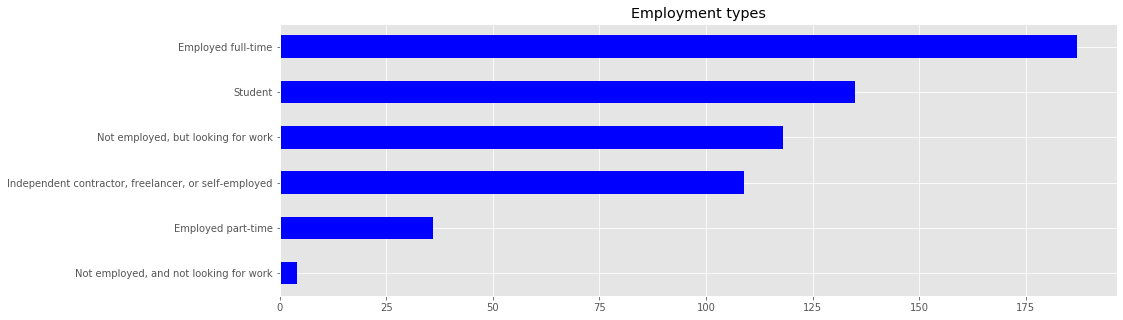

In [53]:
nig_dev['Employment'].value_counts().sort_values().plot(kind='barh', figsize=(15,5), title="Employment types",rot=0,color='blue')

In [77]:
nig_dev_gender = nig_dev.Gender.value_counts(dropna=False)
nig_dev_gender

Man                                                  408
NaN                                                  151
Woman                                                 31
Woman;Man                                              2
Non-binary, genderqueer, or gender non-conforming      1
Name: Gender, dtype: int64

In [80]:
male, female, others = 0,0,0
for line in nig_dev_gender:
    if line == 'Woman':
        female += 1
    elif line == 'Man':
        male += 1
    else:
        others += 1
print(f"There are {male} males, {female} females and {others} other genders")

There are 0 males, 0 females and 5 other genders


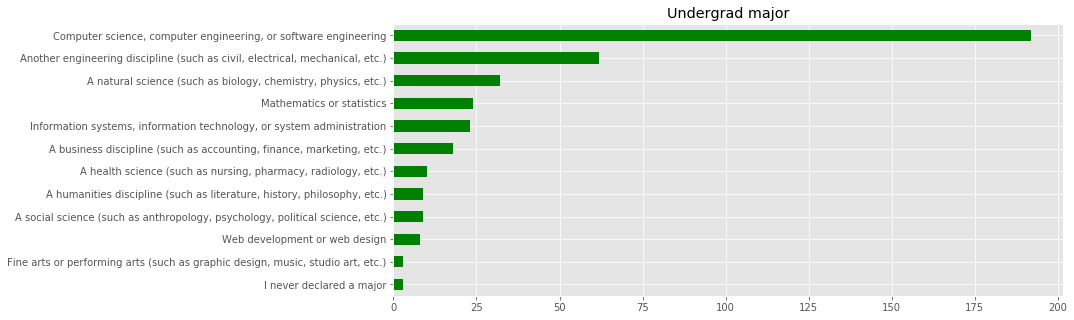

In [68]:
nig_dev['UndergradMajor'].value_counts().sort_values().plot(kind='barh', figsize=(12,5), title="Undergrad major",rot=0,color='green')

In [83]:
nig_dev['LanguageWorkedWith'].value_counts()

HTML/CSS;JavaScript                                                        36
HTML/CSS;JavaScript;PHP;SQL                                                28
HTML/CSS;JavaScript;PHP                                                    16
HTML/CSS;JavaScript;TypeScript                                             14
Python                                                                     13
HTML/CSS                                                                   12
HTML/CSS;JavaScript;Python                                                 10
Java                                                                        9
HTML/CSS;Python                                                             8
HTML/CSS;Java;JavaScript;PHP;SQL                                            8
HTML/CSS;JavaScript;PHP;Python                                              6
HTML/CSS;Java;JavaScript;Python                                             6
C#;HTML/CSS;JavaScript;SQL                                      

In [91]:
Nig_lang_resp = nig_dev['LanguageWorkedWith']
Nig_lang_resp.fillna(value = 'No Resp', inplace=True)
Nig_lang_resp.isnull().sum()

0

In [92]:
type(nig_dev['LanguageWorkedWith'].str.split(';'))

pandas.core.series.Series

In [118]:
Lang_split = Nig_lang_resp.str.split(';')
Lang_split

252                           [C#, JavaScript, TypeScript]
958      [Bash/Shell/PowerShell, C, C#, C++, HTML/CSS, ...
1610      [C++, HTML/CSS, Java, JavaScript, PHP, SQL, VBA]
2754                        [HTML/CSS, JavaScript, Python]
3032     [HTML/CSS, JavaScript, Python, Ruby, SQL, Type...
4001                       [JavaScript, Swift, TypeScript]
4819                                    [HTML/CSS, Python]
5516                  [C#, HTML/CSS, JavaScript, PHP, SQL]
5679                                             [No Resp]
5882                                [HTML/CSS, JavaScript]
6381       [HTML/CSS, JavaScript, Python, SQL, TypeScript]
6500                      [Go, HTML/CSS, JavaScript, Rust]
7204           [HTML/CSS, Java, JavaScript, PHP, SQL, VBA]
7273                                             [No Resp]
7824       [HTML/CSS, JavaScript, PHP, Python, TypeScript]
7973                         [C#, JavaScript, Python, SQL]
8643                              [JavaScript, TypeScrip

In [115]:
import collections
from collections import Counter

In [134]:
all_lang_resp=[]
for i, value in enumerate(Lang_split):
    all_lang_resp.extend(value)

counts = Counter(all_lang_resp)
counts = pd.DataFrame(counts, index=['No of users'])
counts = counts.transpose().sort_values('No of users', ascending=False)
top_10 = counts.head(10).reset_index()
top_10.columns =['Languages','Count']
top_10

,Languages,Count
0,HTML/CSS,395
1,JavaScript,366
2,SQL,242
3,PHP,218
4,Python,192
5,Java,174
6,C#,100
7,No Resp,87
8,TypeScript,86
9,C++,74


In [170]:
avg = nig_dev['YearsCode']
avg.unique()

array(['3', '12', '2', '5', '6', '8', 'Less than 1 year', '7', nan, '1',
       '15', '9', '20', '10', '4', '13', '17', '11', '14', '16', '18',
       '26', '23', '37'], dtype=object)

In [177]:
avg = avg.replace('Less than 1 year',1)

In [178]:
avg.value_counts()

3.0     81
2.0     71
1.0     60
5.0     56
4.0     49
6.0     38
8.0     34
10.0    27
7.0     26
9.0     20
11.0    11
12.0     8
20.0     5
15.0     4
14.0     4
23.0     3
13.0     3
18.0     3
17.0     1
16.0     1
26.0     1
37.0     1
Name: YearsCode, dtype: int64

In [176]:
avg_age= round(avg.mean(),1)
avg_age

5.4

In [183]:
nig_dev[(nig_dev['Gender'] == 'Woman') & (nig_dev['Age'] < 25) & (nig_dev['CompTotal'] > 0)]

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
49392,50414,I am a developer by profession,Yes,23.0,21,Monthly,210000.0,6912.0,Nigeria,Nigerian naira,...,Easy,Appropriate in length,No,Mathematics or statistics,Gatsby;Ruby on Rails,Express;Flask;React.js,A lot more welcome now than last year,40.0,2,1
